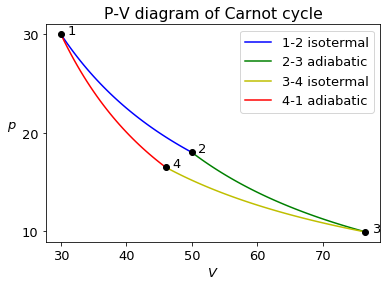

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
g = 1.4 #можно варьировать коэффициент
f1 = lambda x: 900./x
f2 = lambda x: 900.*(50.**(g-1.))/(x**g)
f3 = lambda x: ((30.**(g+1.))/(46.**(g-1.)))/x
f4 = lambda x: (30.**(g+1.))/(x**g)
# Uniform grid on interval [0,1]
rcParams['font.size'] = '13'
n = 101
xx = np.linspace(30, 80, n)
diff2 = np.abs(f1(xx) - f2(xx))
diff3 = np.abs(f2(xx) - f3(xx))
diff4 = np.abs(f3(xx) - f4(xx))
# Find index of minimal value
i1 = 30.0
i2 = np.argmin(diff2)
i3 = np.argmin(diff3)
i4 = np.argmin(diff4)
fig, ax = plt.subplots()
plt.xticks(np.arange(30, 90, step=10))
plt.yticks(np.arange(10, 40, step=10))
line1, = ax.plot(xx.clip(30, 50), f1(xx.clip(30, 50)), 'b-')
line1.set_label('1-2 isotermal')
line1, = ax.plot(xx.clip(50, xx[i3]), f2(xx.clip(50, xx[i3])), 'g-')
line1.set_label('2-3 adiabatic')
line1, = ax.plot(xx.clip(xx[i4], xx[i3]), f3(xx.clip(xx[i4], xx[i3])), 'y-')
line1.set_label('3-4 isotermal')
line1, = ax.plot(xx.clip(30, xx[i4]), f4(xx.clip(30, xx[i4])), 'r-')
line1.set_label('4-1 adiabatic')
ax.plot(30., 30., 'ko')
ax.plot(xx[i2], f1(xx[i2]), 'ko')
ax.plot(xx[i3], f2(xx[i3]), 'ko')
ax.plot(xx[i4], f3(xx[i4]), 'ko')
ax.set(xlabel='$\mathit{V}$',
       title='P-V diagram of Carnot cycle')
ax.set_ylabel('$\mathit{p}$', rotation = 0, labelpad = 10)
plt.text(31., 30., '1', fontsize=13)
plt.text(xx[i2]+1., f1(xx[i2]), '2', fontsize=13)
plt.text(xx[i3]+1., f2(xx[i3]), '3', fontsize=13)
plt.text(xx[i4]+1., f4(xx[i4]), '4', fontsize=13)
ax.legend()
plt.savefig('intersection.png', dpi = 300, format = 'png')

('NNZ(A) = ', 99)
('w - A v = ', 0.0)


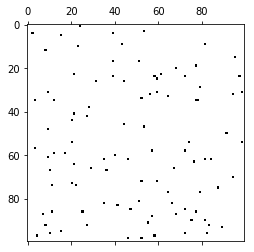

In [2]:
# Matrix-vector product in COO-format
%matplotlib inline
import numpy as np
import scipy.sparse as sps
from matplotlib import pyplot as plt
# Create sparse matrix with random values
n = 100
A = np.zeros((n, n))
nnz = 0
eps = 1e-2
for i in range(n):
    for j in range(n):
        val = np.random.rand()
        if (val < eps):
            nnz += 1
            A[i,j] = val
print('NNZ(A) = ',nnz)
# Display sparcity pattern
plt.spy(A)
plt.savefig('sparsity_pattern.png', dpi = 300, format = 'png')
# Convert to LIL format
lil = []
for i in range(n):
    b = []
    for j in range(n):
        if (A[i,j] > 0):
            b.append([j, A[i,j]])
    lil.append(b)
# Compute w = Av
v = np.random.rand(n)
w = np.zeros(n)
w_ex = np.zeros(n)
for i in range(n):
    for x in lil[i]:
        w[i] += x[1] * v[x[0]]
for i in range(n):
    for j in range(n):
        w_ex[i] = w_ex[i] + A[i,j] * v[j]
# Built-in multiplication
#w_ex = A * v
# Check
print('w - A v = ', np.linalg.norm(w - w_ex, np.Inf))

(720, 1280, 3) uint8
[[0.00833333 0.0125     0.02083333]
 [0.01666667 0.0125     0.01666667]
 [0.01666667 0.01666667 0.025     ]]


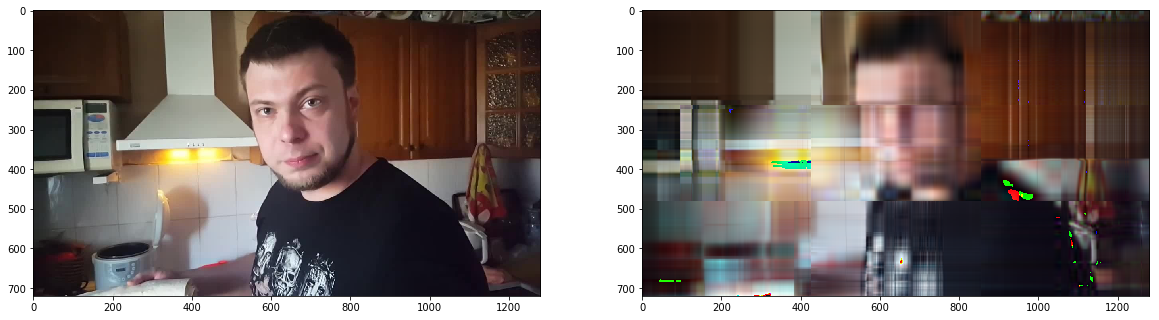

In [3]:
%matplotlib inline
from scipy import ndimage
import imageio
import numpy as np
from matplotlib import pyplot as plt
face = imageio.imread('figures/animal.jpg') # Читаем файл в многомерный массив
print face.shape, face.dtype # размеры и тип
# создаём массив для приближенного изображения
eps = 0.1
nx = 3
ny = 3

def comp(face):
    global C
    face_appr = np.zeros(shape = face.shape, dtype = float)
    for i in range(0,3):
        u, s, v = np.linalg.svd(face[:,:,i])
        r = 0
        while s[r]/s[0] >= eps:
            r = r + 1
            
        u_r = u[:, :r]
        s_r = s[:r]
        v_r = v[:r, :] # Mind the transpose here!
        face_appr[:,:,i] = u_r.dot(np.diag(s_r).dot(v_r))
    face_appr = np.rint(face_appr)
    face_appr = face_appr.astype('uint8')
    C = r*1./s.shape[0]
    return face_appr

def comp_row(facec):
    global nc
    facecc = np.array_split(facec, nx, axis=1)
    face_appr = comp(facecc[0])
    nc = np.array(C)
    for l in range(1,nx):
        face_appr = np.append(face_appr, comp(facecc[l]), axis=1)
        nc = np.append(nc, C)
    return face_appr
    
facec = np.array_split(face, ny, axis=0)

face_appr = comp_row(facec[0])

n = nc
for k in range(1,ny):
    face_appr = np.append(face_appr, comp_row(facec[k]), axis=0)
    n = np.append(n, nc)

n = n.reshape(nx, ny)
    
error = face - face_appr
print n
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10))
ax2.imshow(face_appr)
ax1.imshow(face)
plt.savefig('figures/svd_of_image.png', dpi = 600, format = 'png', bbox_inches='tight')